In [1]:
from glob import glob
from os.path import join
import rasterio as rio
import matplotlib.pyplot as plt
from uavsar_pytools.uavsar_tools import read_annotation
import numpy as np
from skimage.restoration import unwrap_phase

In [14]:
slc_keys = ['slc bytes per pixel','slc data units','slc_1_1x1 rows','slc_1_1x1 columns','peg latitude','peg longitude','peg heading',
'start time of acquisition','1x1 slc range pixel spacing','1x1 slc azimuth pixel spacing','slc_1_1x1_mag.row_mult',
'slc_1_1x1_mag.col_mult','polarization','slc bytes per pixel','slc pixel format','look direction','minimum look angle', 
'maximum look angle']

In [2]:
work_dir = '/scratch/zacharykeskinen/slc_stack/'
j = 0
for i in glob(join(work_dir, '*')):
    if '.slc' in i:
        if j == 0:
            slc_fp = i
            ann_fp = i.replace('_s1_1x1.slc','.ann')
            d = read_annotation(ann_fp)
            rows = d['slc_1_1x1 rows']['value']
            cols = d['slc_1_1x1 columns']['value']
            arr_1 = np.fromfile(i, dtype = np.complex64).reshape((rows, cols))
        if j == 1:
            slc_fp = i
            ann_fp = i.replace('_s1_1x1.slc','.ann')
            d = read_annotation(ann_fp)
            rows = d['slc_1_1x1 rows']['value']
            cols = d['slc_1_1x1 columns']['value']
            arr_2 = np.fromfile(i, dtype = np.complex64).reshape((rows, cols))
        j += 1

# Magnitude of image 1

In [36]:
mag = np.abs(arr_1)
mag_db = 10*np.log10(mag)

/tmp/ipykernel_175060/248032174.py:2: RuntimeWarning: divide by zero encountered in log10
  mag_db = 10*np.log10(mag)


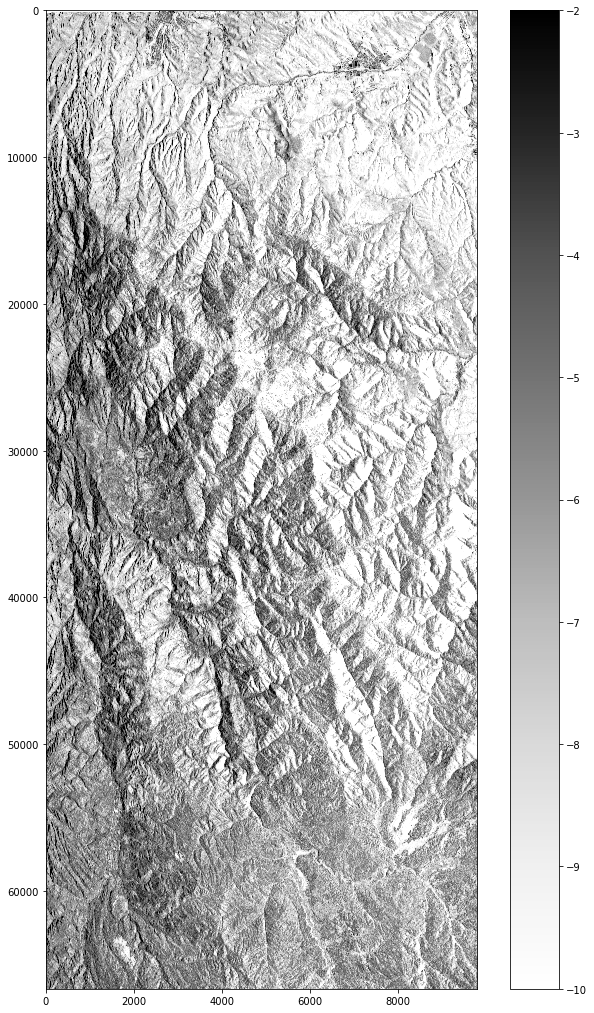

In [46]:
plt.subplots(figsize = (12,18))
plt.imshow(mag_db, vmax= -2, vmin = -10, cmap = 'Greys', aspect = 1/3)
plt.colorbar()

/tmp/ipykernel_175060/782764781.py:2: RuntimeWarning: divide by zero encountered in log10
  mag_1_db = 10*np.log10(mag_1)


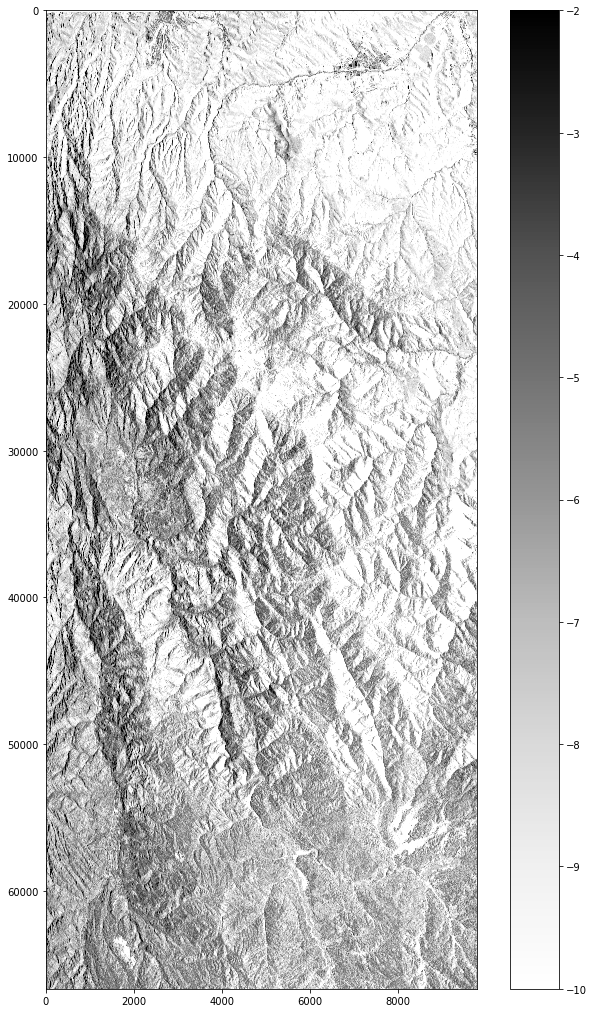

In [63]:
mag_2 = np.abs(arr_2)
mag_2_db = 10*np.log10(mag_2)
plt.subplots(figsize = (12,18))
plt.imshow(mag_2_db, vmax= -2, vmin = -10, cmap = 'Greys', aspect = 1/3)
plt.colorbar()

# Phase of image 1

In [47]:
phase = np.angle(arr_1)
phase_2 = np.angle(arr_2)

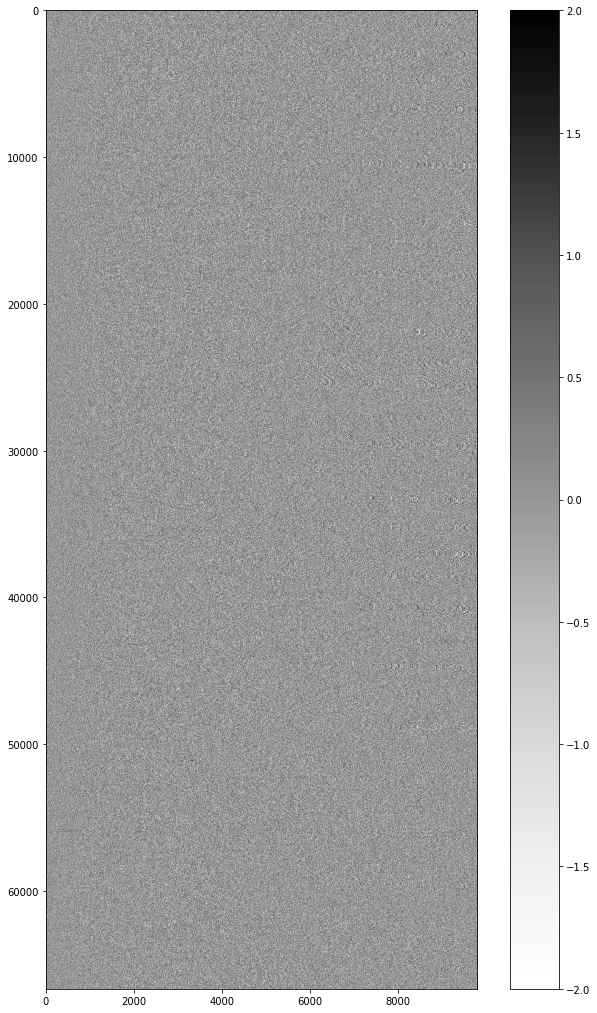

In [48]:
plt.subplots(figsize = (12,18))
plt.imshow(phase, vmax= 2, vmin = -2, cmap = 'Greys', aspect = 1/3)
plt.colorbar()

In [ ]:
plt.subplots(figsize = (12,18))
plt.imshow(phase_2, vmax= 2, vmin = -2, cmap = 'Greys', aspect = 1/3)
plt.colorbar()

# phase difference img 2- img 1

In [3]:
phase_1 = np.angle(arr_1)
phase_2 = np.angle(arr_2)
phase_2_conj = np.conjugate(phase_2)
wrapped = phase_1 * phase_2_conj

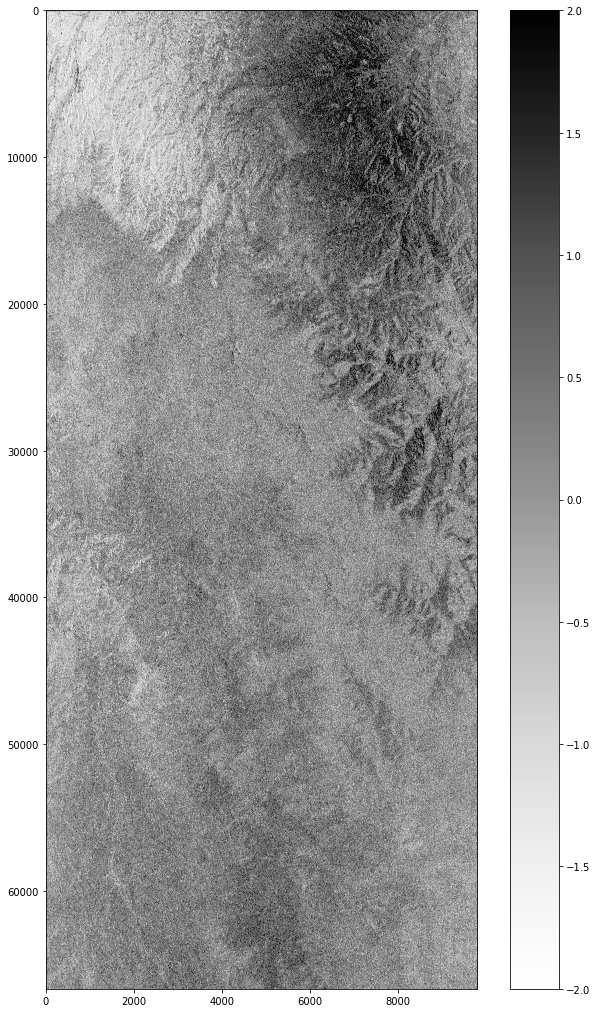

In [ ]:
plt.subplots(figsize = (12,18))
plt.imshow(wrapped, vmax= 2, vmin = -2, cmap = 'Greys', aspect = 1/3)
plt.colorbar() 

## unwrap

In [7]:
WRAPPED.shape

(400, 201)

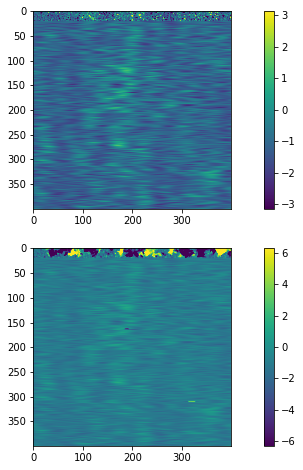

In [13]:
f, axes = plt.subplots(2, figsize = (12,8))
wrapped_test= wrapped[100:500,100:500]
WRAPPED = np.fft.rfft(wrapped_test)
WRAPPED[int(WRAPPED.shape[0]/20):,int(WRAPPED.shape[1]/20):] = 0   # Note, rft.shape = 21
wrapped_smooth = np.fft.irfft(WRAPPED)
a = axes[0].imshow(wrapped_smooth, vmin = -np.pi, vmax = np.pi)
plt.colorbar(a, ax=axes[0])

# Perform phase unwrapping
image_unwrapped = unwrap_phase(wrapped_smooth)
b = axes[1].imshow(image_unwrapped, vmin = -2*np.pi, vmax = 2*np.pi)
plt.colorbar(b, ax=axes[1])

In [8]:
# Perform phase unwrapping
image_unwrapped = unwrap_phase(wrapped)

In [ ]:
plt.subplots(figsize = (12,18))
plt.imshow(image_unwrapped, vmax= 6, vmin = -6, cmap = 'Greys', aspect = 1/3)
plt.colorbar() 